In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

In [2]:
path = "https://raw.githubusercontent.com/jangrae/csv/master/titanic_train.csv"
data = pd.read_csv(path)

In [3]:
data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [4]:
data = data.drop(['Cabin', 'Ticket', 'PassengerId', 'Name'], axis = 1)

In [5]:
main_tit_list = ['Mr', 'Miss', 'Mrs']
data.loc[data['Title'].isin(main_tit_list)==False, ['Title']] = 'Others'

In [6]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Others
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,NaN,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [7]:
data['Age'].fillna(data.groupby('Title')['Age'].transform('mean').round(0),inplace=True)

In [8]:
data['Embarked'].fillna('S', inplace = True)

In [9]:
data['AgeGroup'] = pd.cut(data['Age'], 
                          bins=[0, 16, 25, 35, 60, 100], 
                          labels=['0_16', '17_25', '26_35', '36_60', '61_100'])

In [10]:
data.drop('Age', axis = 1, inplace = True)

In [11]:
dummy_vars = ['Title', 'AgeGroup', 'Pclass', 'Sex', 'Embarked']
data = pd.get_dummies(data, columns=dummy_vars, drop_first=True)

In [12]:
target = 'Survived'
x = data.drop(target, axis = 1)
y = data[target]

In [13]:
x = (x-x.min())/(x.max()-x.min())
x

,SibSp,Parch,Fare,Title_Mr,Title_Mrs,Title_Others,AgeGroup_17_25,AgeGroup_26_35,AgeGroup_36_60,AgeGroup_61_100,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.125,0.000000,0.014151,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.125,0.000000,0.139136,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000,0.000000,0.015469,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.125,0.000000,0.103644,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000,0.000000,0.015713,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.000,0.000000,0.025374,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
887,0.000,0.000000,0.058556,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.125,0.333333,0.045771,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,0.000,0.000000,0.058556,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
model = KNeighborsClassifier()
cv_score = cross_val_score(model, x_train, y_train, cv = 15)
print(cv_score.mean())
result = {}
result['KNN'] = cv_score.mean()
print(cv_score)

0.810607820363918
[0.83333333 0.78571429 0.76190476 0.76190476 0.80952381 0.85714286
 0.88095238 0.78571429 0.80487805 0.80487805 0.80487805 0.75609756
 0.82926829 0.82926829 0.85365854]


In [15]:
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
model = SVC()
cv_score = cross_val_score(model, x_train, y_train, cv = 15)
print(cv_score.mean())
result['SVC'] = cv_score.mean()
print(cv_score)

0.8233449477351917
[0.78571429 0.83333333 0.9047619  0.78571429 0.78571429 0.83333333
 0.88095238 0.83333333 0.7804878  0.82926829 0.75609756 0.87804878
 0.7804878  0.90243902 0.7804878 ]


In [16]:
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
model = DecisionTreeClassifier()
cv_score = cross_val_score(model, x_train, y_train, cv = 15)
print(cv_score.mean())
result['DecisionTree'] = cv_score.mean()
print(cv_score)

0.7912891986062719
[0.83333333 0.80952381 0.73809524 0.80952381 0.85714286 0.69047619
 0.80952381 0.80952381 0.68292683 0.7804878  0.85365854 0.70731707
 0.87804878 0.7804878  0.82926829]


In [17]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
model = LogisticRegression()
cv_score = cross_val_score(model, x_train, y_train, cv = 15)
print(cv_score.mean())
result['Logistic'] = cv_score.mean()
print(cv_score)

0.8056136275648471
[0.9047619  0.83333333 0.83333333 0.80952381 0.78571429 0.78571429
 0.85714286 0.73809524 0.70731707 0.73170732 0.82926829 0.80487805
 0.87804878 0.80487805 0.7804878 ]


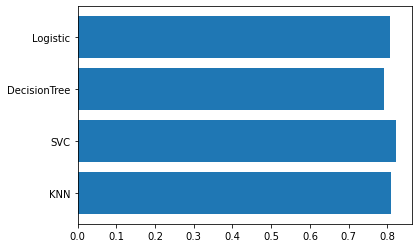

In [18]:
plt.barh(y=list(result), width = result.values())
plt.show()

In [21]:
model_sv = SVC()

params = {'C' : np.logspace(-3,4,8),
         'gamma' : [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]}

model = GridSearchCV(model_sv,
                    params,
                    cv = 10,
                    scoring = 'r2')
model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 1, 10, 100]},
             scoring='r2')

In [22]:
print(model.best_params_)
print(model.best_score_)

{'C': 10000.0, 'gamma': 0.01}
0.2952766531713899
